# Practice Problem: Heat Diffusion in 2D

Study thermal diffusion in 2D using the **Crank-Nicolson method**. Consider the diffusion of a quantity $u(x, y, t)$ over a two-dimensional spatial domain $ x\in = [-L_x,+L_x]$ and $y\in [-L_y,+L_y]$.

The governing equation for this process is the 2D diffusion equation:

$$
\frac{\partial u}{\partial t} = c \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
$$

where $c$ is the diffusion coefficient.

At time $t=0$, the quantity $u(x, y, 0)$ is a **square pulse** centered at the origin $(0,0)$ equal to $1.0$ within the region $[-\frac{L_x}{4}, +\frac{L_x}{4}] \times [-\frac{L_y}{4}, +\frac{L_y}{4}] $ and $0.0$ everywhere else. Implement fixed **Dirichlet** boundary conditions where the value of $u$ is held at $0.0$ along all four edges of the domain for all times.

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt


## Domain definition:

In [2]:
# Define the domain and resolution
Lx = Ly = 1.0
Nx = Ny = 20

# Spatial steps (index i)
delta_x = delta_y = 2*Lx/Nx

# Diffusion coeficient
c = 1.

# Time step
t_sim = 0.1
n_t   = 100
delta_t = t_sim/n_t

#print(delta_t)

### Mesh creation

In [3]:
# 2D axes
x = np.linspace(-Lx, +Lx, Nx)
y = np.linspace(-Ly, +Ly, Ny)

# Meshgrid
x_2d, y_2d = np.meshgrid(x, y)

#print(x_2d.size)

### Initial condition

In [4]:
# Empty array
u = np.zeros((Nx, Ny))

#print(u.shape)
# Add 1's inside the central box
u[Nx //2 - Nx // 6:Nx//2 + Nx // 6, Ny //2 - Ny // 6:Ny//2 + Ny // 6] = 1.


### Plotting the IC:

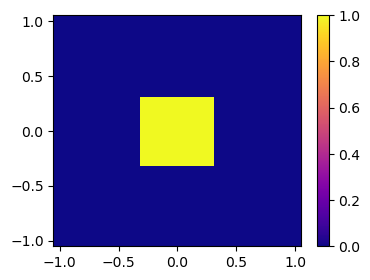

In [5]:
plt.figure(figsize=(4,3))

z_0 = plt.pcolor(x_2d, y_2d, u, cmap = "plasma", clim = (0,1))

plt.colorbar(z_0)

plt.show()

### Numerics:

$\alpha=\frac{c\,\Delta t}{2\,\Delta x^2}$

In [6]:
# Define alpha

alpha = c*delta_t/(2*delta_x**2)

print(-alpha, 1+ 4.*alpha)

-0.04999999999999999 1.2


In [7]:
# Flatten the grid
N = Nx*Ny



### LHS of the Crank Nicolson Method:

In [8]:
# Diagonal elements
diag_0 = (1 + 4*alpha)*np.ones(N)
diag_s = -alpha*np.ones(N - 1)
diag_u = -alpha*np.ones(N - Nx)
#print(diag_s.shape)

# For the A matrix (LHS)

a_matrix = np.diag(diag_0)
a_matrix += np.diag(diag_s, k = 1)
a_matrix += np.diag(diag_s, k = -1)
a_matrix += np.diag(diag_u, k = Nx)
a_matrix += np.diag(diag_u, k = -Nx)

print(a_matrix.shape)

(400, 400)


In [9]:
# Define
b = u.flatten()

#print(b.shape)

# Flattened solution
u_new = np.linalg.solve(a_matrix, b)

print(u_new.shape)

# Reshape solution
u_new = u_new.reshape((Nx, Ny))

print(u_new.shape)

(400,)
(20, 20)


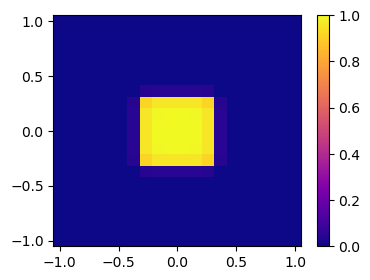

In [10]:
plt.figure(figsize=(4,3))

z_0 = plt.pcolor(x_2d, y_2d, u_new, cmap = "plasma", clim = (0,1))

plt.colorbar(z_0)

plt.show()

### RHS of the Crank-Nicolson method

In [11]:
# Diagonal elements
diag_0 = (1 - 4*alpha)*np.ones(N)
diag_s = alpha*np.ones(N - 1)
diag_u = alpha*np.ones(N - Nx)
#print(diag_s.shape)

# For the A matrix (LHS)

b_matrix = np.diag(diag_0)
b_matrix += np.diag(diag_s, k = 1)
b_matrix += np.diag(diag_s, k = -1)
b_matrix += np.diag(diag_u, k = Nx)
b_matrix += np.diag(diag_u, k = -Nx)

print(b_matrix.shape)

(400, 400)


In [12]:
# Define b using the explicit step
b = b_matrix @ u.flatten()

# Flattened solution
u_new = np.linalg.solve(a_matrix, b)

print(u_new.shape)

# Reshape solution
u_new = u_new.reshape((Nx, Ny))

print(u_new.shape)

(400,)
(20, 20)


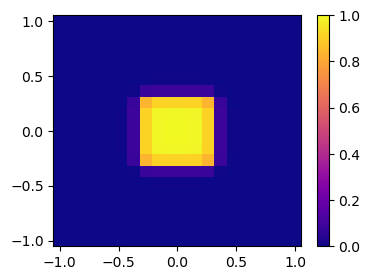

In [13]:
plt.figure(figsize=(4,3))

z_0 = plt.pcolor(x_2d, y_2d, u_new, cmap = "plasma", clim = (0,1))

plt.colorbar(z_0)

plt.show()

### Time evolution loop


In [14]:
# Empty 3D array (t,y,x)

macro_arr = np.zeros((n_t, Ny, Nx))

print(macro_arr.shape)

macro_arr[0, :, : ] = u

(100, 20, 20)


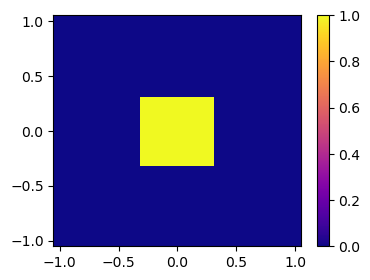

In [15]:
plt.figure(figsize=(4,3))

z_0 = plt.pcolor(x_2d, y_2d, macro_arr[0, :, : ], cmap = "plasma", clim = (0,1))

plt.colorbar(z_0)

plt.show()

In [16]:
# Make a copy of the initial condition
u_new = u.copy()

# For loop in time
for n in range(n_t - 1):
    #print(n)

    # Define b using the explicit step - RHS
    b = b_matrix @ u_new.flatten()
    
    # Flattened solution - LHS
    u_new = np.linalg.solve(a_matrix, b)
    
    #print(u_new.shape)
    
    # Reshape solution
    u_new = u_new.reshape((Nx, Ny))
    
    #print(u_new.shape)

    macro_arr[n + 1, :, :] = u_new.copy()

    

In [20]:
plt.figure(figsize=(4,3))

for k in range(n_t):
    z_0 = plt.pcolor(x_2d, y_2d, macro_arr[k, :, : ], cmap = "plasma", clim = (0,1))

    plt.colorbar(z_0)

    plt.savefig(f"dif2d_{k:03d}.png")
    plt.close()

In [19]:
!ls -ltr *.png

-rw-r--r--@ 1 wbandabarragan  staff  11063 May 21 14:46 dif2d_000.png
-rw-r--r--@ 1 wbandabarragan  staff  18821 May 21 14:46 dif2d_001.png
-rw-r--r--@ 1 wbandabarragan  staff  18821 May 21 14:46 dif2d_002.png
-rw-r--r--@ 1 wbandabarragan  staff  18821 May 21 14:46 dif2d_003.png
-rw-r--r--@ 1 wbandabarragan  staff  18821 May 21 14:46 dif2d_004.png
-rw-r--r--@ 1 wbandabarragan  staff  18821 May 21 14:46 dif2d_005.png
-rw-r--r--@ 1 wbandabarragan  staff  18821 May 21 14:46 dif2d_006.png
-rw-r--r--@ 1 wbandabarragan  staff  18821 May 21 14:46 dif2d_007.png
-rw-r--r--@ 1 wbandabarragan  staff  18821 May 21 14:46 dif2d_008.png
-rw-r--r--@ 1 wbandabarragan  staff  18821 May 21 14:46 dif2d_009.png
-rw-r--r--@ 1 wbandabarragan  staff  18821 May 21 14:46 dif2d_010.png
-rw-r--r--@ 1 wbandabarragan  staff  18821 May 21 14:46 dif2d_011.png
-rw-r--r--@ 1 wbandabarragan  staff  18821 May 21 14:46 dif2d_012.png
-rw-r--r--@ 1 wbandabarragan  staff  18821 May 21 14:46 dif2d_013.png
-rw-r--r--@ 1 wbanda